In [1]:
class Phone:
    def __init__(self,date,model,company,type,rating,price,battery_health):
        self.date=date
        self.model=model
        self.company=company
        self.type=type
        self.rating=rating
        self.price=price
        self.battery_health=battery_health
        self.unique_id=id(self)
    def get_date(self):
        return self.__date
    def get_model(self):
        return self.__model
    def get_company(self):
        return self.__company
    def get_type(self):
        return self.__type
    def get_rating(self):
        return self.__rating
    def get_price(self):
        return self.__price
    def get_battery_health(self):
        return self.__battery_health
    def get_unique_id(self):
        return self.__unique_id
    
    def __str__(self):
        return str(self.unique_id) + str(",") + str(self.date) + str(",") + str(self.model) + str(",") + str(self.company) + str(",") + str(self.type) + str(",") + str(self.rating) + str(",") + str(self.price) + str(",") + str(self.battery_health) 
        #return f"{self.unique_id},{self.date},{self.model},{self.company},{self.type},{self.rating},{self.price},{self.battery_health}"

class ApplePhone(Phone):
    def __init__(self,date,model,company,rating,price,battery_health):
        super().__init__(date,model,company,"IPhone",rating,price,battery_health)

class AndroidPhone(Phone):
    def __init__(self,date,model,company,rating,price,battery_health):
        super().__init__(date,model,company,"Android",rating,price,battery_health)

class IPhone(ApplePhone):
    def __init__(self, date, model, rating, price, battery_health):
            super().__init__(date,model, "IPhone",rating, price, battery_health)

class Google(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
            super().__init__(date,model, "Google",rating, price, battery_health)

class Samsung(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
            super().__init__(date,model, "Samsung",rating, price, battery_health)

googlePhone = Google("2022-11-15","modelA", 2, 641, 86.06)
print(str(googlePhone))

import pickle
phones_from_pickle = []
with open('phonepkl50206.dat', 'rb') as fb:
    try: 
        while (True): 
            Phone = pickle.load(fb) 
            phones_from_pickle.append(Phone)
            print(Phone) 
    except EOFError: 
        pass
        
import csv

# Assuming the classes and load_phones function are defined as before

# Function to write phone data to a CSV file
with open('phones_data.csv', 'w') as f:
    f.write("unique_id,date,model,company,type,rating,price,battery_health\n")
    for obj in Phone:
        f.write(str(obj)+'\n')

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('phones_data.csv')

# Display basic info about the dataset (optional)
print(df.info())

#Find a list of the distinct models and then traverse through them to fill the values according to the models.
distinct_models = df['model'].unique()

for model in distinct_models:
    date_by_model = df[df['model'] == model]['date'].mode()[0]
    df.loc[(df['model'] == model) & (df['date'].isnull()), 'date'] = date_by_model

for model in distinct_models:
    average_rating = round(df[df['model'] == model]['rating'].mean(),0)
    df.loc[(df['model'] == model) & (df['rating'].isnull()), 'rating'] = average_rating

for model in distinct_models:
    average_price = round(df[df['model'] == model]['price'].mean(),0)
    df.loc[(df['model'] == model) & (df['price'].isnull()), 'price'] = average_price
    
for model in distinct_models:
    average_battery_health = round(df[df['model'] == model]['battery_health'].mean(),2)
    df.loc[(df['model'] == model) & (df['battery_health'].isnull()), 'battery_health'] = average_battery_health

df.to_csv('phone_data_cleaned.csv', index=False)


2758318678672,2022-11-15,modelA,Google,Android,2,641,86.06
[<__main__.IPhone object at 0x00000282389AE710>, <__main__.Google object at 0x00000282389AEA50>, <__main__.Google object at 0x00000282389AEB50>, <__main__.IPhone object at 0x00000282389AEBD0>, <__main__.Samsung object at 0x00000282389AECD0>, <__main__.Samsung object at 0x00000282389AED90>, <__main__.Samsung object at 0x00000282389AEE10>, <__main__.Samsung object at 0x00000282389AEED0>, <__main__.Google object at 0x00000282389AEF50>, <__main__.IPhone object at 0x00000282389AEFD0>, <__main__.Google object at 0x00000282389AF090>, <__main__.IPhone object at 0x00000282389AF150>, <__main__.Google object at 0x00000282389AF1D0>, <__main__.Samsung object at 0x00000282389AF250>, <__main__.Samsung object at 0x00000282389AF2D0>, <__main__.Google object at 0x00000282389AF390>, <__main__.Google object at 0x00000282389AF450>, <__main__.Google object at 0x00000282389AF550>, <__main__.Google object at 0x00000282389AF690>, <__main__.IPhone objec

PermissionError: [Errno 13] Permission denied: 'phone_data_cleaned.csv'

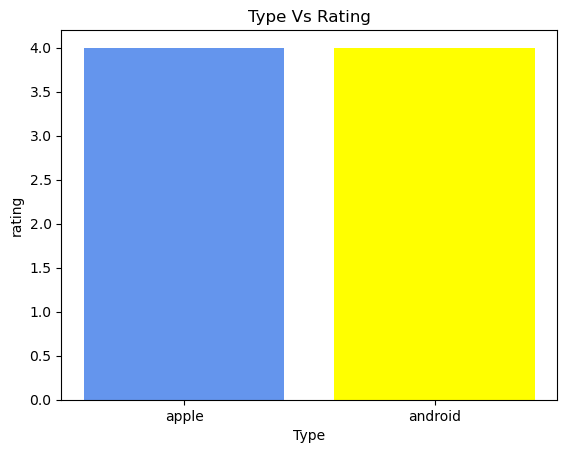

[4, 4, 15, 21, 33, 47, 61, 102, 133, 170, 262, 233]


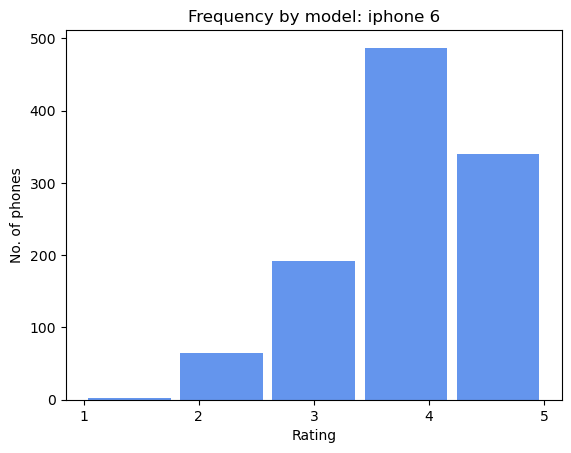

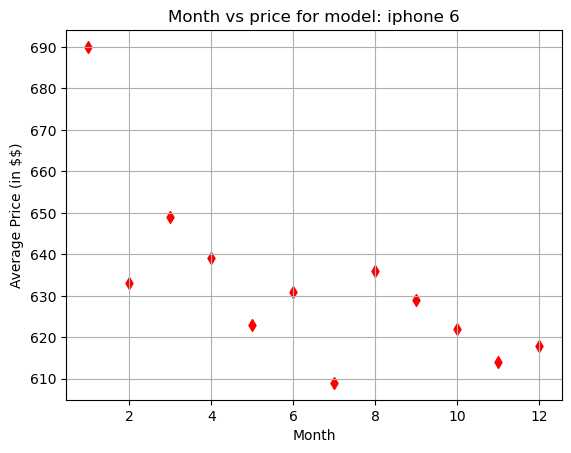

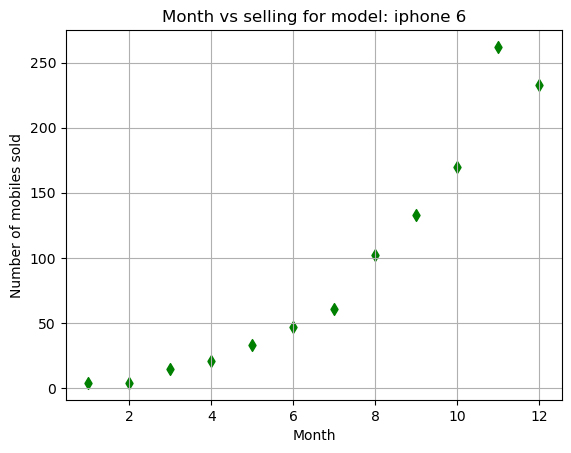

[9, 5, 10, 26, 38, 54, 70, 115, 130, 177, 183, 312]


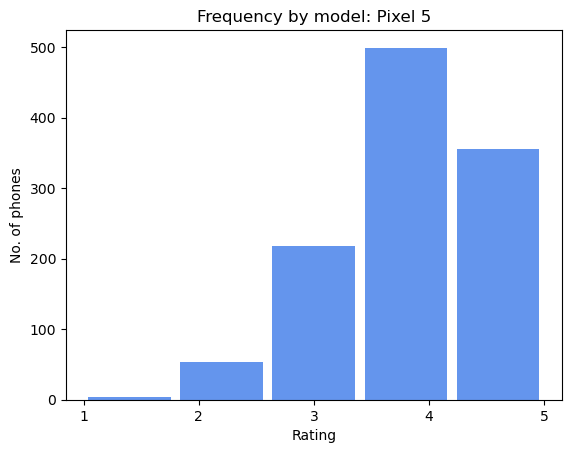

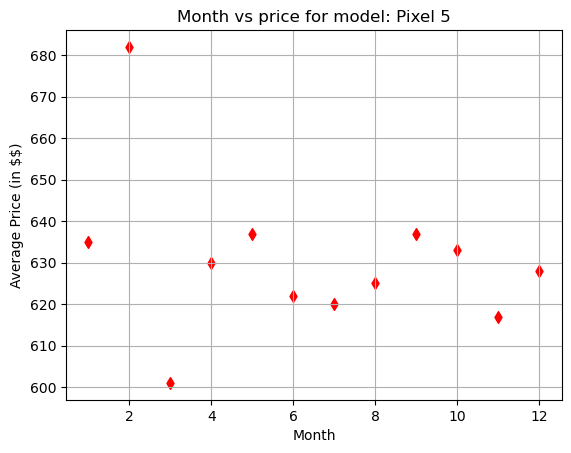

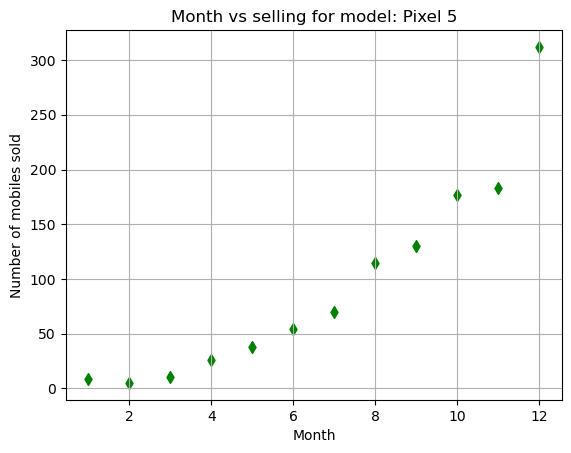

[6, 5, 8, 26, 38, 33, 79, 99, 140, 182, 211, 320]


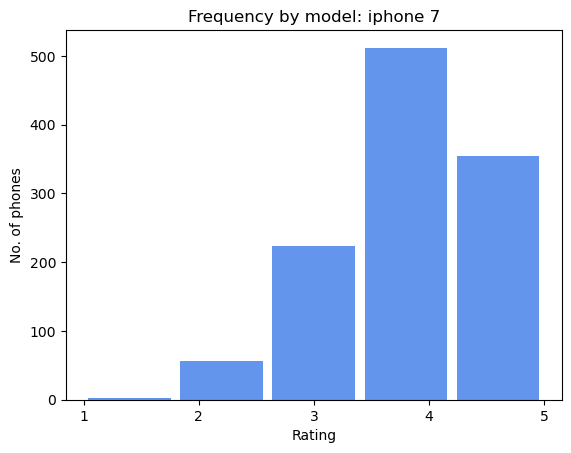

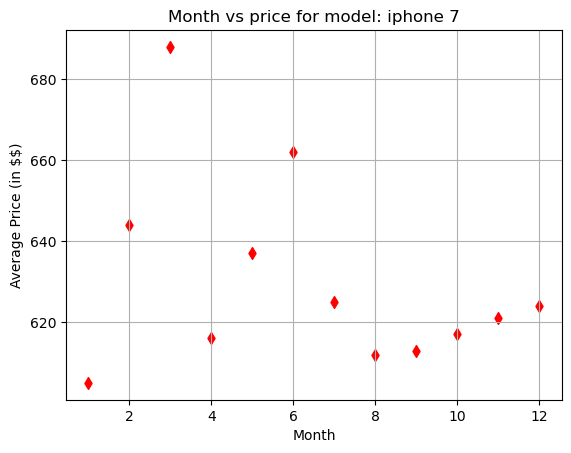

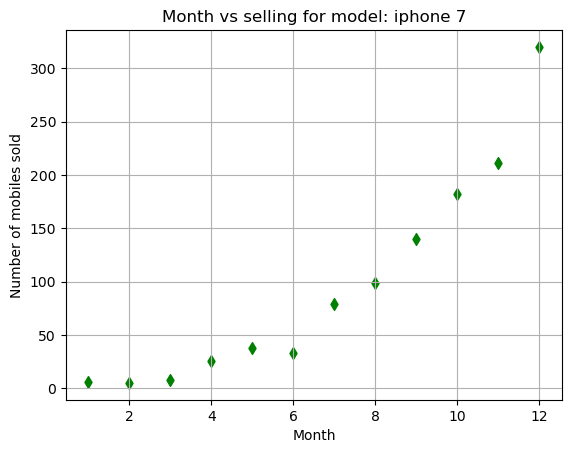

[5, 3, 10, 19, 36, 48, 67, 91, 134, 163, 200, 284]


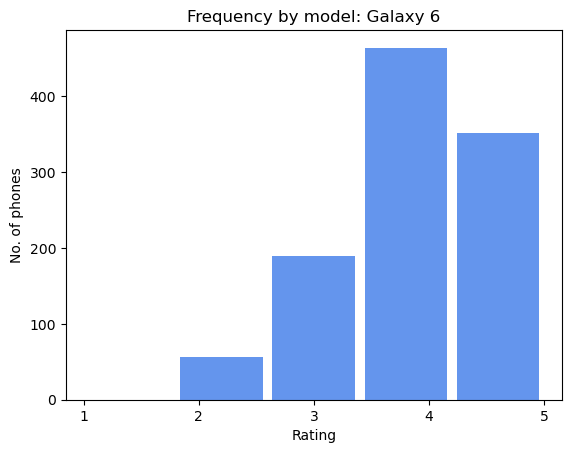

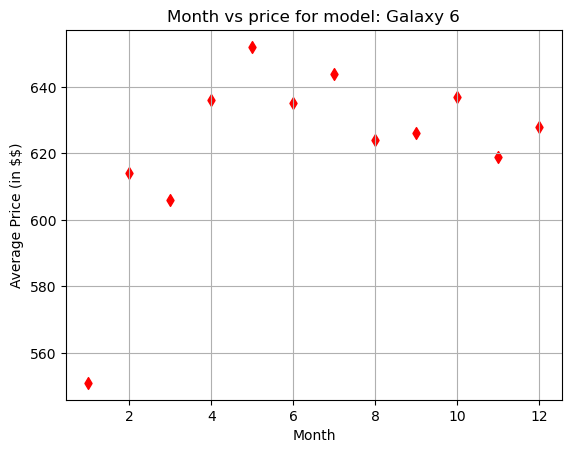

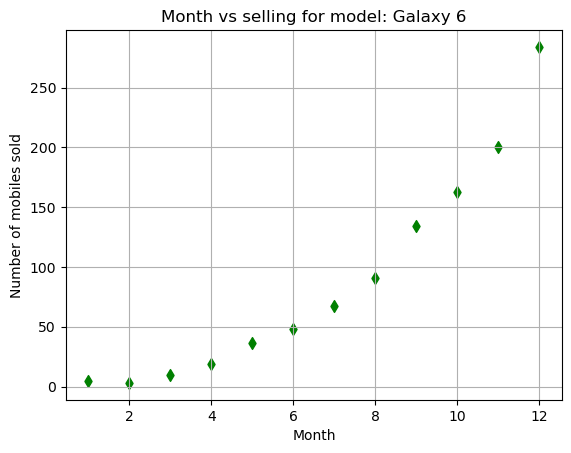

[5, 2, 13, 20, 44, 31, 70, 110, 126, 195, 187, 321]


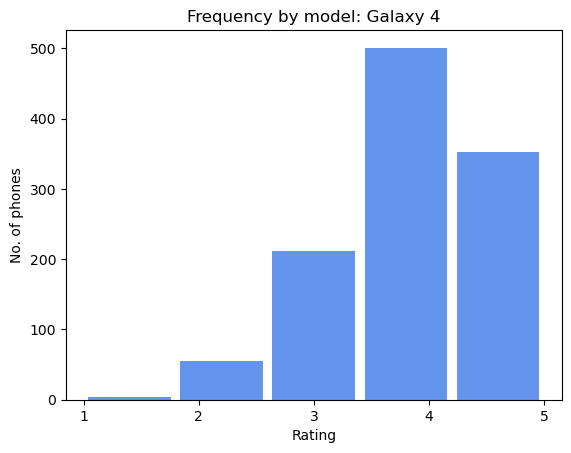

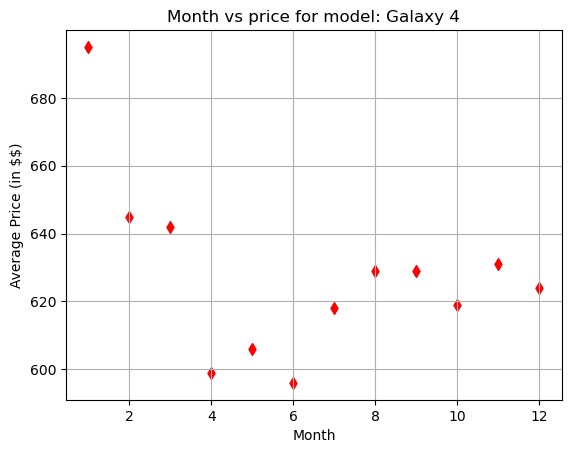

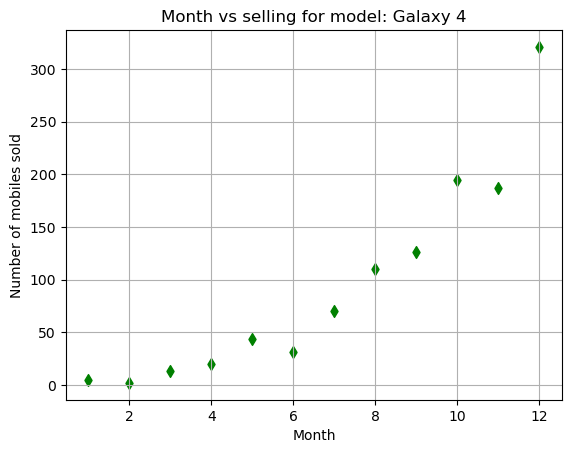

[4, 5, 14, 26, 41, 58, 76, 97, 115, 175, 245, 258]


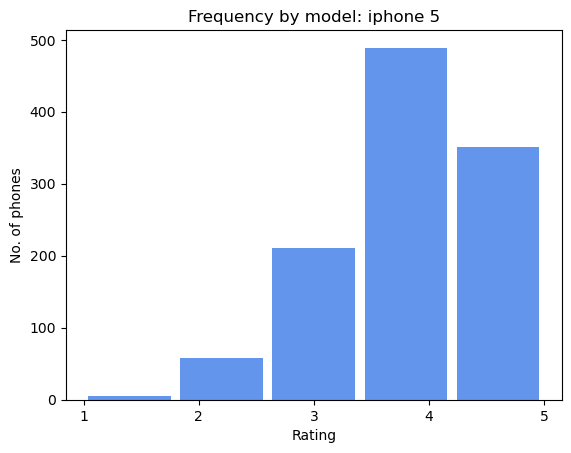

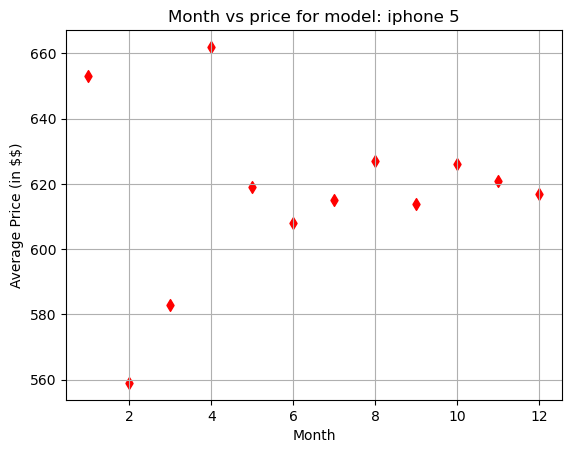

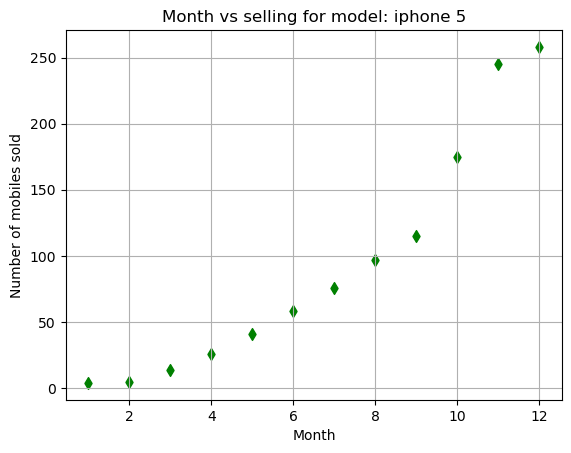

[8, 1, 14, 19, 30, 51, 76, 97, 113, 193, 201, 290]


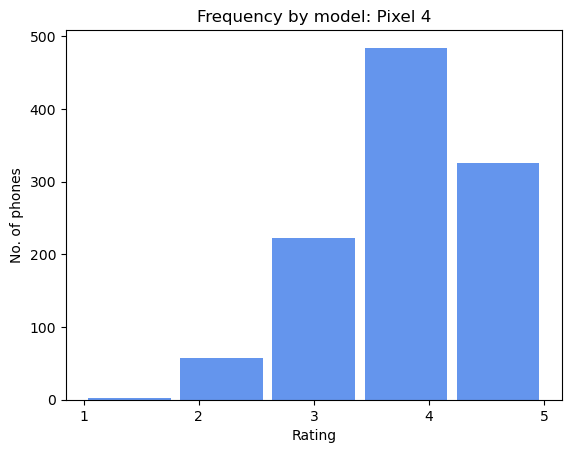

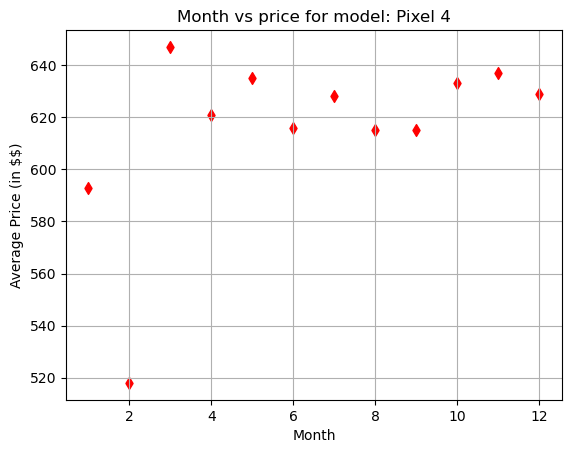

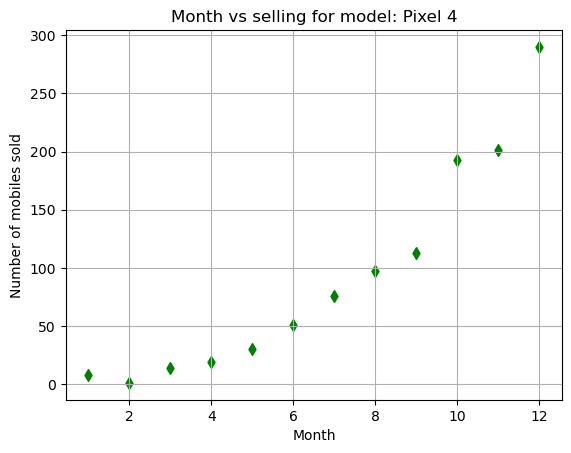

[8, 6, 10, 24, 36, 48, 80, 104, 107, 159, 196, 319]


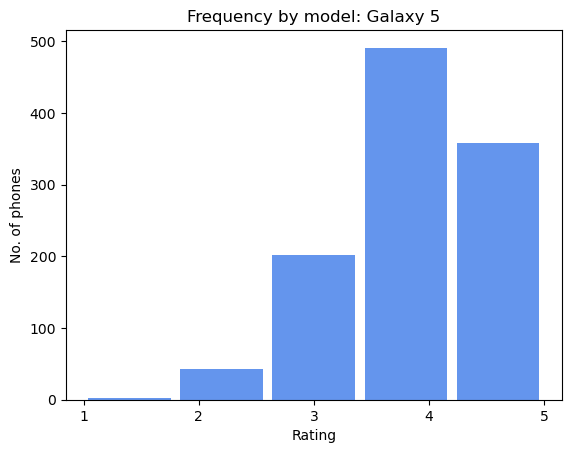

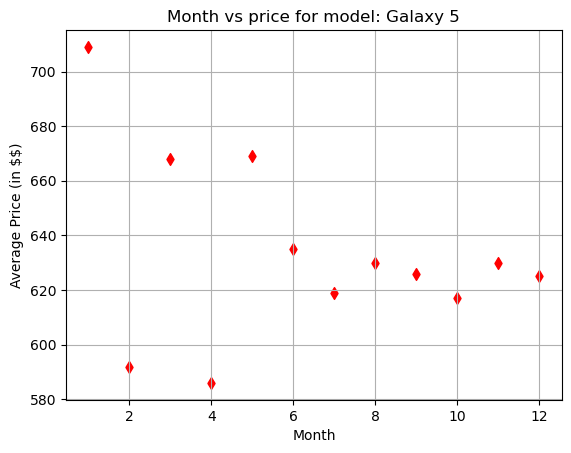

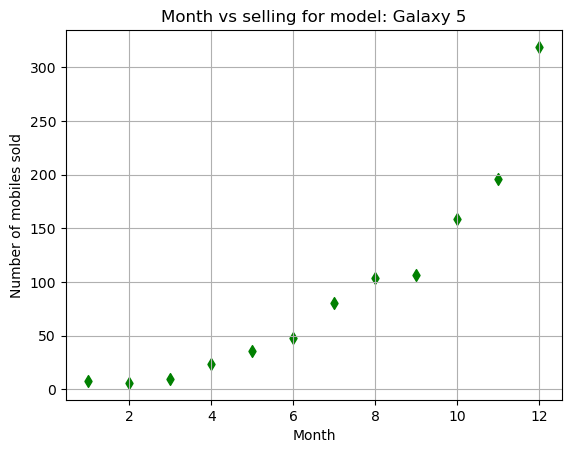

[3, 1, 13, 10, 42, 53, 74, 110, 138, 163, 191, 353]


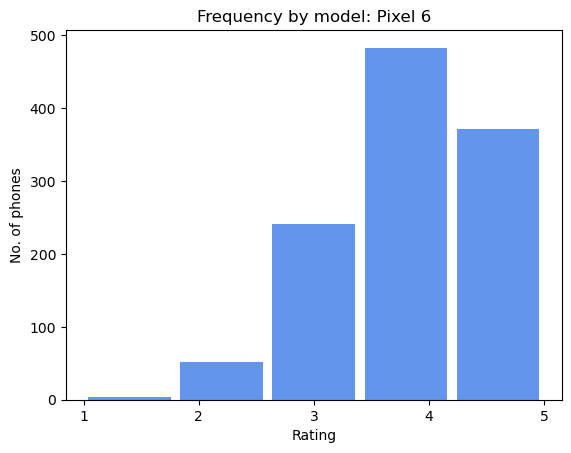

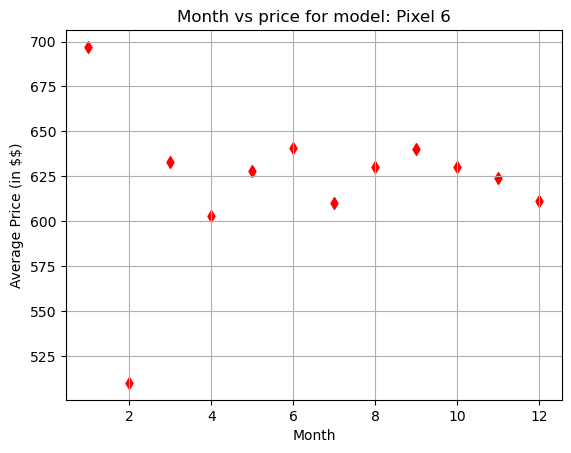

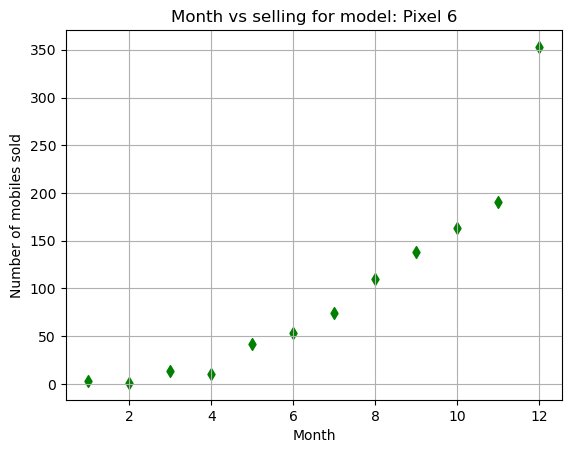

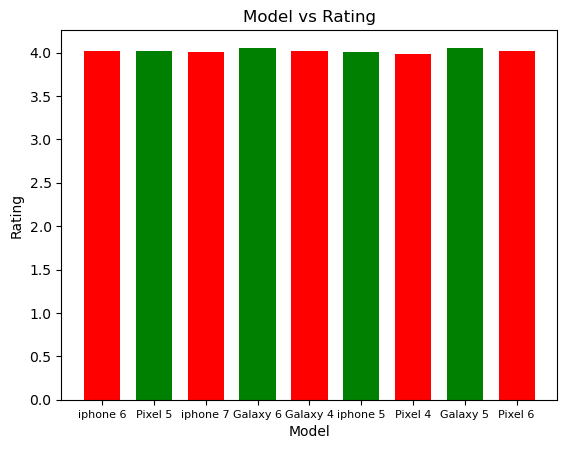

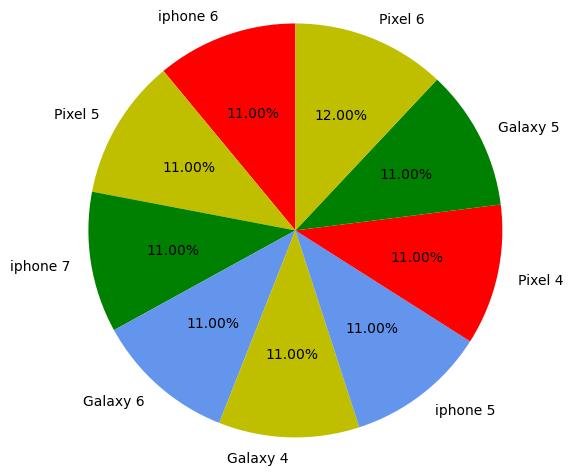

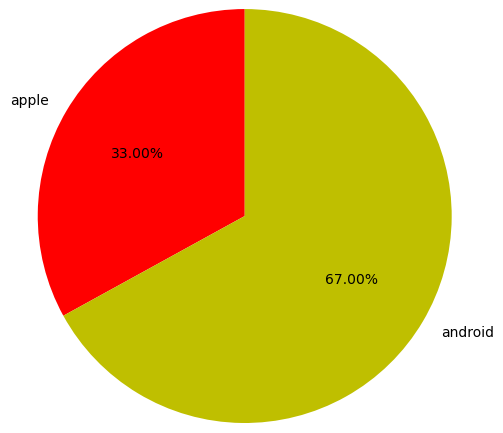

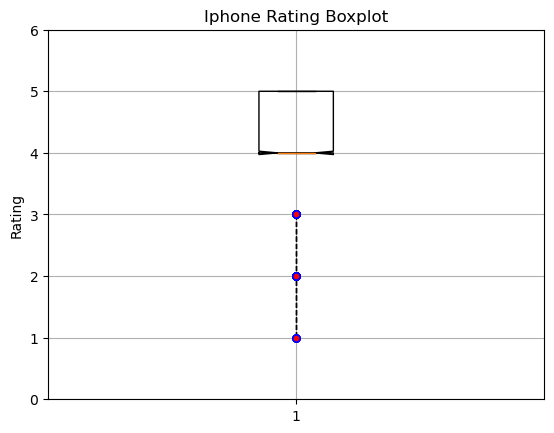

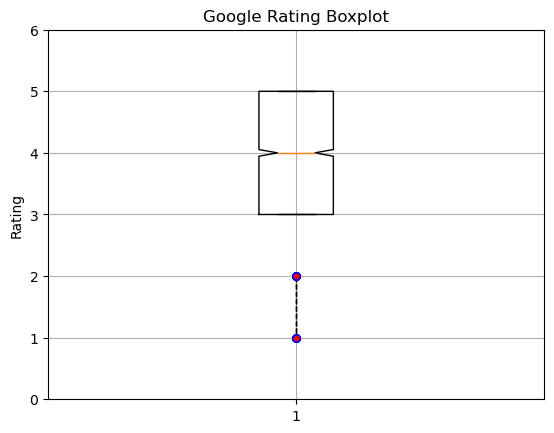

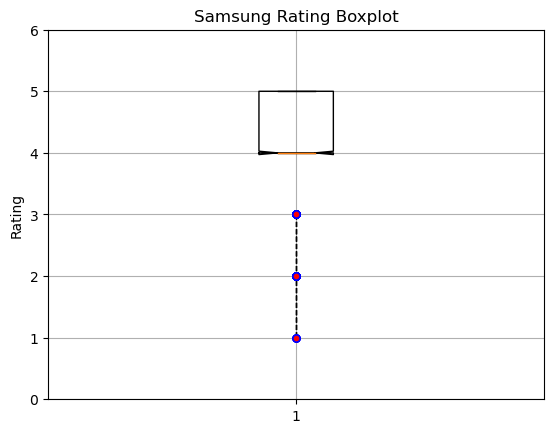

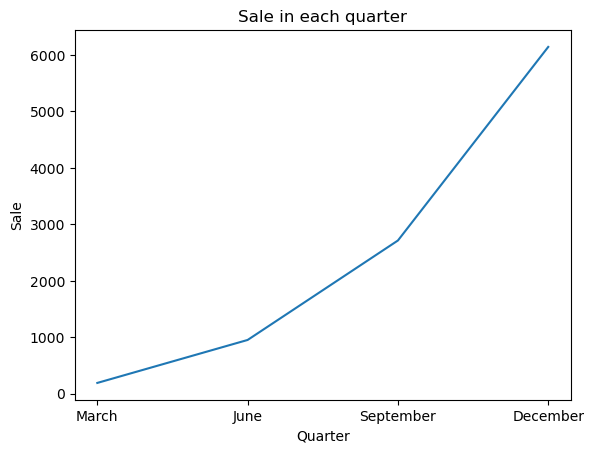

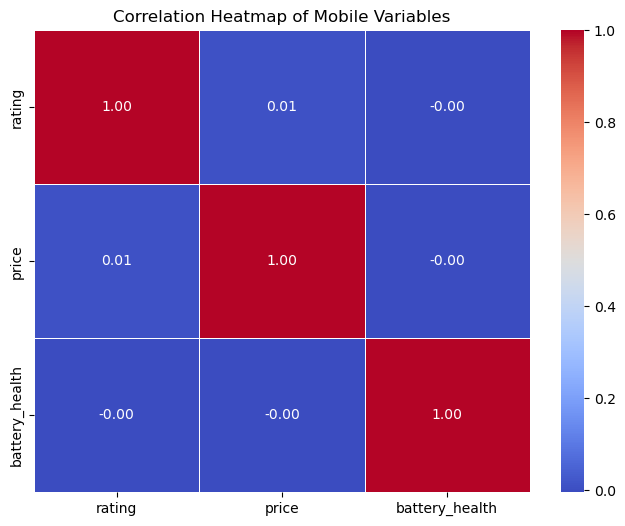

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

# Read the CSV file into a DataFrame
df = pd.read_csv('phone_data_cleaned.csv')

'''Extract the distinct values of type,model to run for loops'''
distinct_type = df['type'].unique()
distinct_models = df['model'].unique()
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
#distinct_company= df['company'].unique()
average_type_rating=[]
mode_type_percentage=[]

#print (distinct_company)
iphone_rating=[]
Google_rating=[]
Samsung_rating=[]

'''Extract the values of the rating for the boxplot'''
iphone_rating.append(df[df['company'] == 'IPhone']['rating'].tolist())
Google_rating.append(df[df['company'] == 'Google']['rating'].tolist())
Samsung_rating.append(df[df['company'] == 'Samsung']['rating'].tolist())

#print(iphone_battery)
#print(Google_battery)
#print(Samsung_battery)

'''Extracting the average of the rating and the percentage of the market share for a particular type'''

for type in distinct_type:
    average_type = round(df[df['type'] == type]['rating'].mean(),0)
    average_type_rating.append(average_type)
    mode_type= round(((df['type'] == type).sum())/9999*100)
    mode_type_percentage.append(mode_type)

'''Bar plots'''
# labels for bars. If this option is omitted, the categorical values of the bars will be treated as the labels for the x-axis
t_label = distinct_type
#plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(distinct_type,average_type_rating, tick_label=t_label, width =0.8, color = ['cornflowerblue', 'yellow'])
# Naming the x-axis
plt.xlabel('Type')
# Naming the y-axis
plt.ylabel('rating')
# plot title
plt.title('Type Vs Rating')
# function to show the plot
plt.show()


distinct_model = df['model'].unique()
#print(distinct_model)

average_rating_model=[]
mode_model_percentage=[]
unique_rating=[1.0,2.0,3.0,4.0,5.0]
months =  [1,2,3,4,5,6,7,8,9,10,11,12]

for model in distinct_models:
    count_by_model_rating = []
    price_by_model = []
    month_by_model = []
    all_average_price_month_model = []
    all_number_of_mobiles_sold = []

    count_by_model_rating = (df[df['model'] == model]['rating']).tolist()
    price_by_model = (df[df['model'] == model]['price']).tolist()
    month_by_model = (df[df['model'] == model]['Month']).tolist()
    
    for mon in months:
        average_price_month_model = round(df[(df['model'] == model) & (df['Month'] == mon)]['price'].mean(),0)
        number_of_mobiles_sold = len((df[(df['model'] == model) & (df['Month'] == mon)]['price']))
        all_number_of_mobiles_sold.append(number_of_mobiles_sold)
        all_average_price_month_model.append(average_price_month_model)                    
    #print(all_number_of_mobiles_sold)
    
    '''Plotting the histogram for the frequency of model vs rating'''
    
    range = (1, 5)
    bins = 5
    # plotting a histogram
    plt.hist(count_by_model_rating, bins, range,color = 'cornflowerblue', histtype = 'bar', rwidth = 0.9)
    # x-axis label
    plt.xlabel('Rating')
    plt.xticks(unique_rating)
    # frequency label
    plt.ylabel('No. of phones')
    # plot title
    plt.title('Frequency by model: '+ model)
    # function to show the plot
    plt.show()


    '''Plotting the scatter plot for the prices of different ratings based on the model'''
    # plotting points as a scatter plot
    plt.scatter(months, all_average_price_month_model, color= 'red', marker= "d")
    # x-axis label
    plt.xlabel('Month')
    # frequency label
    plt.ylabel('Average Price (in \$\$)')
    # plot title
    plt.title('Month vs price for model: '+ model)
    plt.grid(True) # Note the use of the grid() function to display a grid
    # function to show the plot
    plt.show()

    # plotting points as a scatter plot
    plt.scatter(months, all_number_of_mobiles_sold, color= 'green', marker= "d")
    # x-axis label
    plt.xlabel('Month')
    # frequency label
    plt.ylabel('Number of mobiles sold')
    # plot title
    plt.title('Month vs selling for model: '+ model)
    plt.grid(True) # Note the use of the grid() function to display a grid
    # function to show the plot
    plt.show()

    average_rating = round(df[df['model'] == model]['rating'].mean(),4)
    mode_model= round(((df['model'] == model).sum())/9999*100)
    mode_model_percentage.append(mode_model)
    average_rating_model.append(average_rating)
    
#print(average_rating_model)
#print(mode_model_percentage)


# labels for bars. If this option is omitted, the categorical values of the bars will be treated as the labels for the x-axis
t_label = distinct_model
#plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(distinct_model,average_rating_model, tick_label=t_label, width =0.7, color = ['red', 'green'])
# Naming the x-axis
plt.xlabel('Model')
plt.xticks(fontsize=8)
# Naming the y-axis
plt.ylabel('Rating')
# plot title
plt.title('Model vs Rating')
# function to show the plot
plt.show()

'''Pie charts'''
# color for each label
colors = ['r', 'y', 'g', 'cornflowerblue','y','cornflowerblue','r','g','y']
# plotting the pie chart
plt.pie(mode_model_percentage, labels = distinct_models, colors=colors,startangle=90,radius = 1.4, autopct = '%2.2f%%')
# plotting legend
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# showing the plot
plt.show()



# color for each label
colors = ['r', 'y']
# plotting the pie chart
plt.pie(mode_type_percentage, labels = distinct_type, colors=colors,startangle=90,radius = 1.4, autopct = '%2.2f%%')
# plotting legend
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# showing the plot
plt.show()

'''Print a boxplot for the iphone_rating'''
flierprops = dict(marker='o', markerfacecolor='r', markersize=5, linestyle='--', markeredgecolor='b')
plt.boxplot(iphone_rating, whis=0.25, notch = True, flierprops = flierprops)
#yticks_range = range(0, 6, 1)
plt.ylim(0, 6)
plt.ylabel('Rating')
plt.title('Iphone Rating Boxplot')
plt.grid(True)
plt.show()


'''Print a boxplot for the Google rating'''

flierprops = dict(marker='o', markerfacecolor='r', markersize=5, linestyle='--', markeredgecolor='b')
plt.boxplot(Google_rating, whis=0.25, notch = True, flierprops = flierprops)
#plt.yticks(range(0, 6, 1))
plt.ylim(0, 6)
plt.ylabel('Rating')
plt.title('Google Rating Boxplot')
plt.grid(True)
plt.show()

'''Print a boxplot for the Samsung rating'''

flierprops = dict(marker='o', markerfacecolor='r', markersize=5, linestyle='--', markeredgecolor='b')
plt.boxplot(Samsung_rating, whis=0.25, notch = True, flierprops = flierprops)
#plt.yticks(range(0, 6, 1))
plt.ylim(0, 6)
plt.ylabel('Rating')
plt.title('Samsung Rating Boxplot')
plt.grid(True)
plt.show()

'''Plotting a line graph of the sale in the year per quarter'''


quarters = ('March', 'June', 'September', 'December')

Sale_in_quarter1 = (df['Month'] <= 3).sum()
#print(Sale_in_quarter1)

Sale_in_quarter2 = ((df['Month'] > 3) & (df['Month'] <= 6)).sum()
#print(Sale_in_quarter2)

Sale_in_quarter3 = ((df['Month'] > 6) & (df['Month'] <= 9)).sum()
#print(Sale_in_quarter3)

Sale_in_quarter4 = (df['Month'] >9).sum()
#print(Sale_in_quarter4)

Sales_in_year=[Sale_in_quarter1,Sale_in_quarter2,Sale_in_quarter3,Sale_in_quarter4]
#print(sum(Sales_in_year))
#The plot function accepts two parameters giving the data for the x-axis and the y-axis.
plt.plot(quarters,Sales_in_year)
# The title function accepts a string argument which will be used to display the title for the graph
plt.title("Sale in each quarter")
# The xlabel function is used for the label for the x-axis
plt.xlabel("Quarter")
# The ylabel function is similarly used for the label for the y-axis
plt.ylabel("Sale")
# Finally, the show function displays the plot
plt.show()

'''Plotting a heatmap'''

Numberical_values_dataframe = (df[['rating', 'price', 'battery_health']])
correlation_matrix = Numberical_values_dataframe.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Mobile Variables')
plt.show()

